Text(0, 0.5, 'Кол-во')

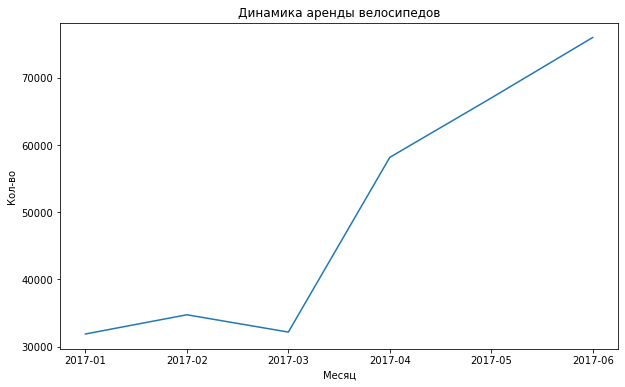

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

data = pd.read_csv('new_york_city.csv')

data['Start Time'] = pd.to_datetime(data['Start Time'], format = '%Y-%m-%d %H:%M:%S') 
data['Start Time'] = data['Start Time'].apply(lambda x: x.strftime('%Y-%m'))

orders_by_month = pd.DataFrame(data.groupby('Start Time')['Start Time'].count())

plt.plot(orders_by_month.index, orders_by_month['Start Time'])
plt.title('Динамика аренды велосипедов')
plt.xlabel('Месяц')
plt.ylabel('Кол-во')

Вывод: В Нью Йорке аренда велосипедов начинает пользоваться спросом с марта и спрос увеличивается каждый последующий месяц, видимо в это время начинает таить снег и погодные условия становятся более комфортными для езды.

Text(0.5, 1.0, 'Процентное соотношение мужчин и женщин')

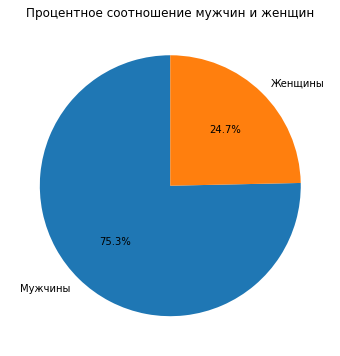

In [89]:
plt.pie(data['Gender'].value_counts(), labels = ['Мужчины','Женщины'], autopct='%1.1f%%', startangle=90)
plt.title('Процентное соотношение мужчин и женщин')

Вывод: Основная ЦА проката велосипедов - мужчины

In [91]:
def calculate_age(born):
    x = 2017 - born ##так как отчет от 2017 года, то и рассчитываем возраст клиентов относительно 2017 года
    return x

data['Year'] = data['Birth Year'].apply(calculate_age)
data['Year'] = data['Year'].fillna(0)
data['Year'] = data['Year'].astype(int)

In [92]:
data.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Year
0,5688089,2017-06,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,19
1,4096714,2017-05,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,36
2,2173887,2017-03,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,30
3,3945638,2017-05,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,31
4,6208972,2017-06,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,25


(-0.5, 1.5)

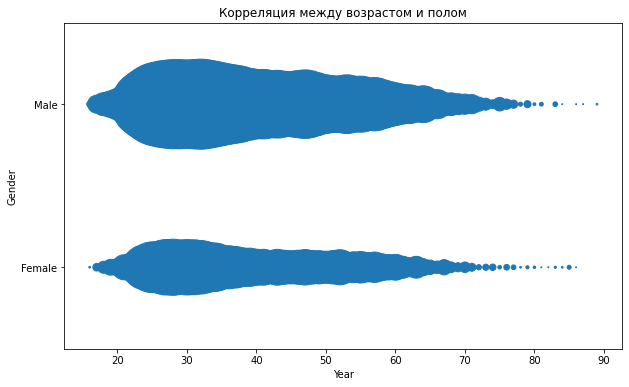

In [152]:
data2 = data[(data.Year > 0) & (data.Year < 90)]
data2 = pd.DataFrame(data2.groupby(['Year','Gender'])['Birth Year'].count()).reset_index()
data2.plot(kind='scatter', 
        x='Year', 
        y='Gender', 
        s='Birth Year',
        title='Корреляция между возрастом и полом')

plt.ylim(-0.5,1.5)

Вывод: Если сравнивать возраст пользователей по гендерной категории и количеству использований, то видно, что мужчины более активнее чем женщины и после 70 лет мужчины продолжают чаще пользоваться арендой велосипедов.

In [158]:
data3 = data.groupby('User Type')['Start Station'].count()

<AxesSubplot:title={'center':'Данные по типу клиентов'}, xlabel='Тип пользователей', ylabel='Количество'>

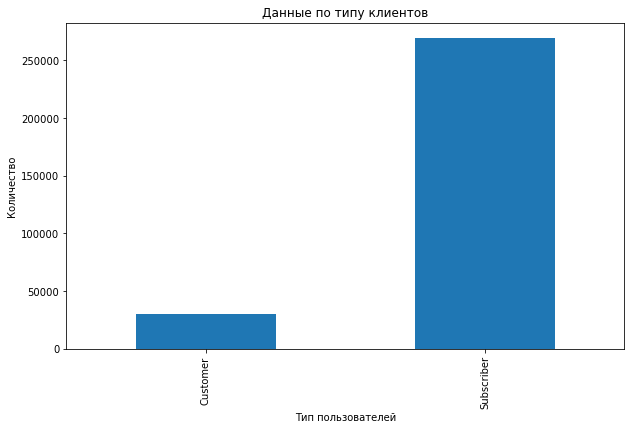

In [160]:
data3.plot(kind='bar',title='Данные по типу клиентов',xlabel='Тип пользователей', ylabel='Количество')

Вывод: Большая часть пользователей пользуются сервисом по подписке, скорее всего это люди, которые постоянно арендуют велосипеды, чтобы доехать до учебы/работы и только небольшая часть совершает разовые поездки.